<a href="https://colab.research.google.com/github/sharmarahulraj03/NLP_Tasks/blob/main/Assignment_2_Part_A_DTI5125_Rahul_Raj_Sharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1 align="center"><b>Data Science Applications</b></H1>
<H3 align="center"><b>Assignment 2</b></H3>
<H5 align="left"><b><u> Overview:</u></b></H5>
<p align="justify">Assignment 2 focuses on the application of classification and clustering techniques to textual documents. The
assignment should be completed individually using either Python or R. Upon completion, present your result in one submission, including the answers generated or plots. Also, submit the source codes used to generate your results asa separate attachment.<br>
This assignment is in two parts; Part A involves exploratory analysis and normalization of the given text data, followed by a comparison of classification techniques. Part B involves the use of clustering techniques to group similar observations into clusters, and extract insight from the unstructured data provided.
.</p>
<H5 align="left"><b><u>Part A: Classification (50 points)</u></b></H5>
<p align="justify">Using the train and test data files containing Covid-19 tweets pulled from Twitter, perform text classification on the
dataset by completing the following (Note that the target class for the dataset is the user sentiment - from extremelypositive to extremely negative):
<ol>
<li>Carry out an exploratory data analysis of the data to determine the number of tweets for each sentiment and for
each location. Also, plot the distribution graph (Histogram / Bar chart) of each sentiment.</li>
<li>Generate word clouds for each sentiment</li>
<li>Preprocess the data in readiness for vectorization (remove stop words, lemmatize, tokenize, etc.)</li>
<li>Vectorize the data using tf-idf approach</li>
<li>Use a weak learner (e.g., decision tree, SVM, Naïve Bayes base model) to predict the class of the test data and
compare the accuracy of your result with an ensemble method (e.g., XGBoost, Gradient boosting, Adaboost).</li>
</ol></p>

**Importing required Libraries.**

In [ ]:
pip install xgboost

In [ ]:
#Import all the important required libraries 
import nltk
import pandas as pd
import numpy as np
import csv
import re
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import Train and Test data
covid_test_data = pd.read_csv("Covid_test_data.csv")
covid_train_data = pd.read_csv("Covid_train_data.csv" , encoding='latin-1')

In [ ]:
#Display first 10 rows of test data
covid_test_data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [ ]:
#Display first 10 rows of train data 
covid_train_data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


**1. Carry out an exploratory data analysis of the data to determine the number of tweets for each sentiment and for each location. Also, plot the distribution graph (Histogram / Bar chart) of each sentiment.**

In [ ]:
# Print the value counts of Country column for train data 
Train_Location_count=covid_train_data["Location"].value_counts()
Train_Location_count

London                           540
United States                    528
London, England                  520
New York, NY                     395
Washington, DC                   373
                                ... 
Ruanda                             1
LON | DUS | MEL | SHA              1
Global HQ                          1
Bucks                              1
I live in Ballarat, Australia      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# Print the value counts of each Sentiments for train data
Train_Sentiments_count=covid_train_data["Sentiment"].value_counts()
Train_Sentiments_count

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

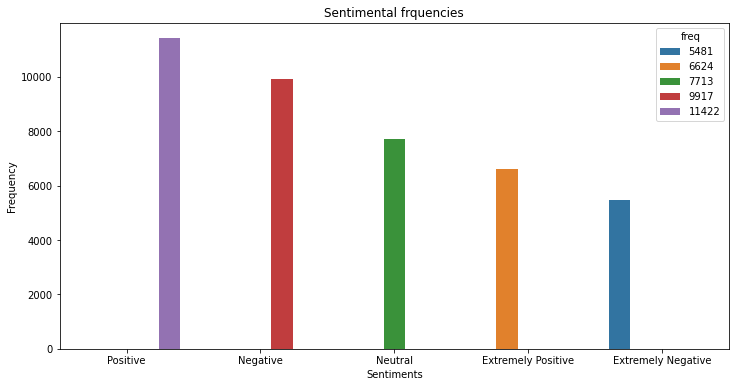

In [ ]:
# GENERATE WORD FREQUENCY and Display Bargraph for Train data
#Generate frequency for all the words
train_frequency_dist = nltk.FreqDist(covid_train_data["Sentiment"])
train_frequency_dist
#Converting word frequency into dataframes
train_frequency_df = pd.DataFrame.from_dict(train_frequency_dist,orient='index').reset_index()
# rename the columns to "word" and "freq"
train_frequency_df.columns=["word", "freq"]
#Plotting Graph
plt.figure(figsize = (12, 6)) 
sns.barplot(data=train_frequency_df.sort_values(by="freq", ascending=False), 
            y="freq", 
            x="word", 
            hue="freq")
plt.ylabel("Frequency")
plt.xlabel("Sentiments")
plt.title("Sentimental frquencies")
plt.show()

**2. Generate word clouds for each sentiment.**

In [ ]:
#Calculate the words for each sentiments of train data
train_positive = covid_train_data.loc[covid_train_data['Sentiment']=='Positive','OriginalTweet']
train_negative = covid_train_data.loc[covid_train_data['Sentiment']=='Negative','OriginalTweet']
train_ext_positive = covid_train_data.loc[covid_train_data['Sentiment']=='Extremely Positive','OriginalTweet']
train_ext_negative = covid_train_data.loc[covid_train_data['Sentiment']=='Extremely Negative','OriginalTweet']
train_neutral = covid_train_data.loc[covid_train_data['Sentiment']=='Neutral','OriginalTweet']

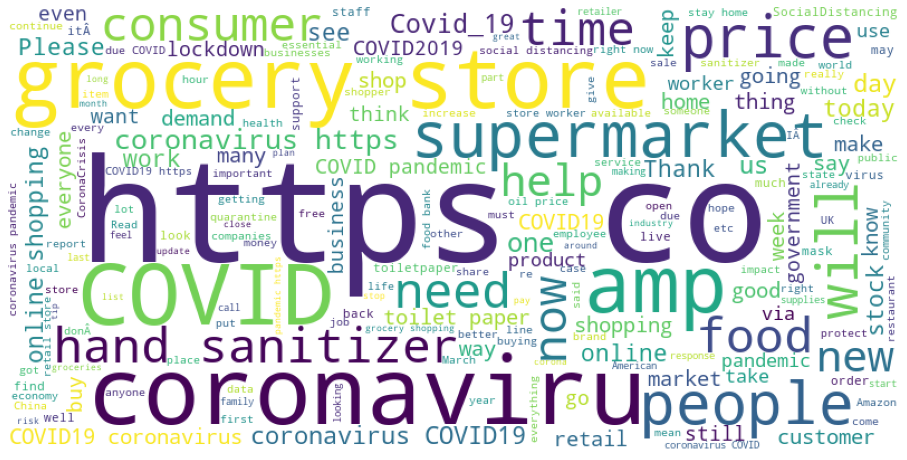

In [ ]:
#Positive word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_positive))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

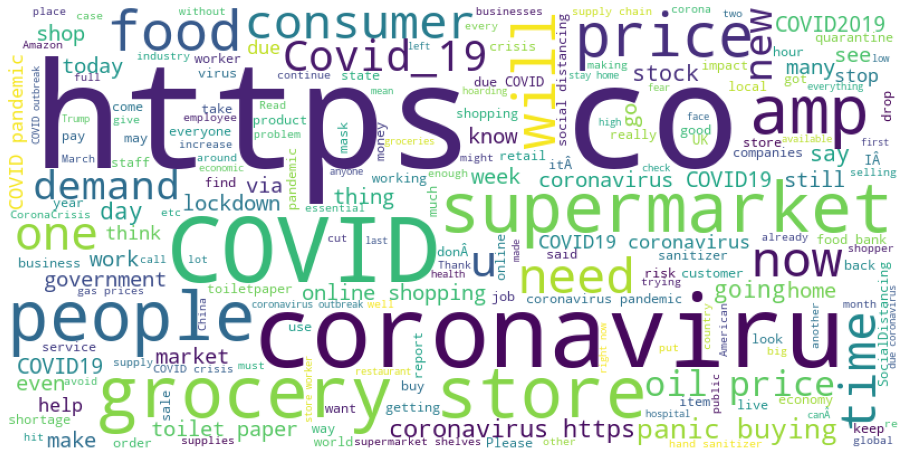

In [ ]:
#Negative word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_negative))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

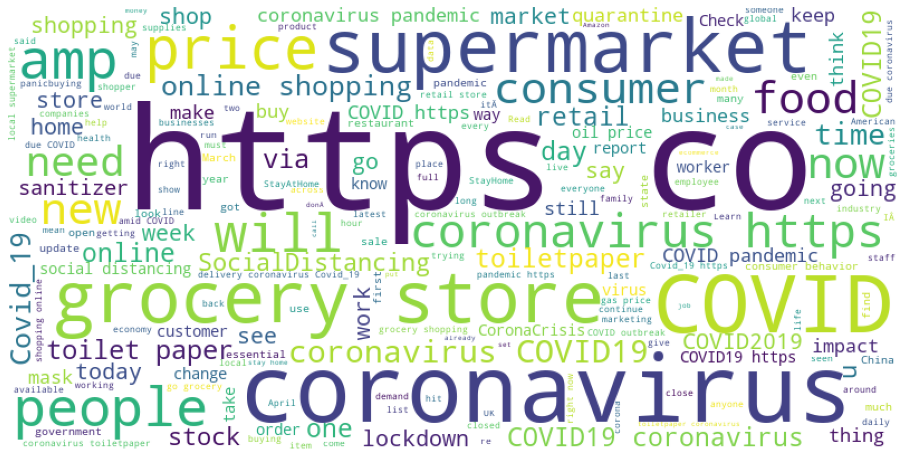

In [ ]:
#Neutral word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_neutral))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

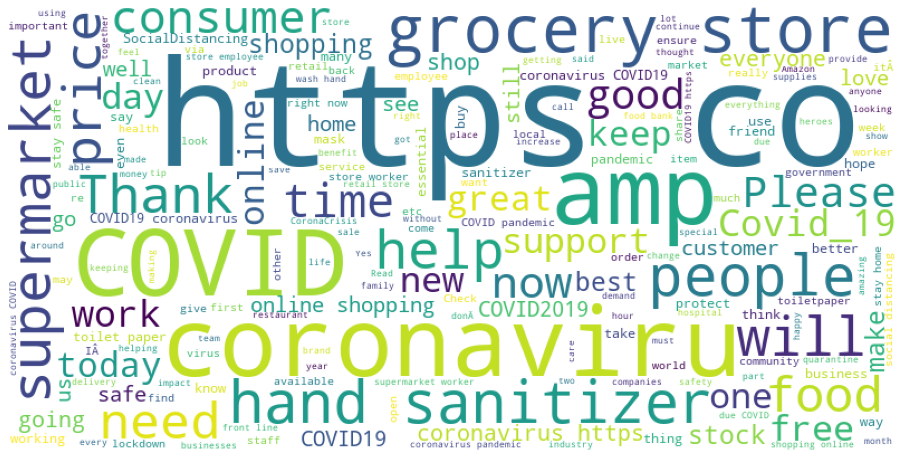

In [ ]:
#Extremely Positive word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_ext_positive))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

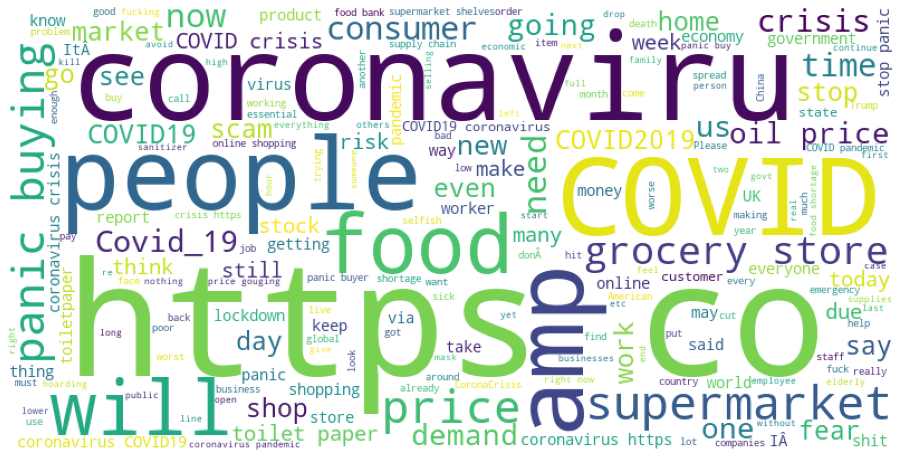

In [ ]:
#Extremely Negative word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_ext_negative))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**3. Preprocess the data in readiness for vectorization (remove stop words, lemmatize, tokenize, etc.)**

In [ ]:
#Display data before Preprocessing 
#Display the first five rows of train data to get an idea 
display(covid_train_data.head())
#Print the summary statistics for train data
print(covid_train_data.describe())
#information print about train data
print(covid_train_data.info())

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


           UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None


In [ ]:
#Removing first 2 unnecessary columns
covid_train_data.drop(columns=["UserName", "ScreenName"], axis=1, inplace=True)
#Removing duplicated rows
covid_train_data.drop_duplicates(inplace=True)
#Changing datatype
covid_train_data["TweetAt"] = pd.to_datetime(covid_train_data["TweetAt"])
# Print the information of Train data
print(covid_train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       32567 non-null  object        
 1   TweetAt        41157 non-null  datetime64[ns]
 2   OriginalTweet  41157 non-null  object        
 3   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.6+ MB
None


In [ ]:
#Function for Preprocessing the Train data
def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
covid_train_data["Processed"] = covid_train_data["OriginalTweet"].str.lower().apply(process_tweets)

# Print the first ten rows of Processed
covid_train_data.head(10)

,Location,TweetAt,OriginalTweet,Sentiment,Processed
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[]
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p..."
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld..."
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, panic, enoug..."
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, supermarket, outbreak, paranoid, food,..."
5,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,"[news, first, confirmed, case, came, sullivan,..."
6,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive,"[cashier, grocery, store, sharing, insights, p..."
7,Austria,2020-03-16,Was at the supermarket today. Didn't buy toile...,Neutral,"[supermarket, today, buy, toilet, paper, rebel..."
8,"Atlanta, GA USA",2020-03-16,Due to COVID-19 our retail store and classroom...,Positive,"[due, retail, store, classroom, atlanta, open,..."
9,"BHAVNAGAR,GUJRAT",2020-03-16,"For corona prevention,we should stop to buy th...",Negative,"[corona, prevention, stop, buy, things, cash, ..."


In [ ]:
# Get the tweet lengths for train data
covid_train_data["Length"] = covid_train_data["OriginalTweet"].str.len()
# Get the number of words in tweets train data
covid_train_data["Words"] = covid_train_data["OriginalTweet"].str.split().str.len()
# Display the new columns of train data
display(covid_train_data[["Length", "Words"]])

,Length,Words
0,111,8
1,237,38
2,131,14
3,306,42
4,310,40
...,...,...
41152,102,12
41153,138,23
41154,136,18
41155,111,18


In [ ]:
# Fill the missing values with unknown tag in train data
covid_train_data["Location"].fillna("unknown", inplace=True)

In [ ]:
#function for preprocessing Test data in order to use further in calculating accuracy
def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
covid_test_data["Processed"] = covid_test_data["OriginalTweet"].str.lower().apply(process_tweets)

# Print the first ten rows of Processed
covid_test_data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Processed
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,"[trending, new, yorkers, encounter, empty, sup..."
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,"[could, find, hand, sanitizer, fred, meyer, tu..."
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,"[find, protect, loved, ones, coronavirus]"
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,"[panic, buying, hits, newyork, city, anxious, ..."
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[toiletpaper, dunnypaper, coronavirus, coronav..."
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,"[remember, last, time, paid, gallon, regular, ..."
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,"[voting, age, coronavirus, hand, sanitizer, su..."
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral,"[stop, without, protecting, healthworkers, pri..."
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative,"[twitter, pharmacist, sell, hand, sanitizer, l..."
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive,"[anyone, supermarket, last, days, went, normal..."


In [ ]:
# Get the tweet lengths of test data
covid_test_data["Length"] = covid_test_data["OriginalTweet"].str.len()
# Get the number of words in tweets of test data
covid_test_data["Words"] = covid_test_data["OriginalTweet"].str.split().str.len()
# Display the new columns of test data
display(covid_test_data[["Length", "Words"]])

,Length,Words
0,228,23
1,193,30
2,73,13
3,318,37
4,252,26
...,...,...
3793,127,18
3794,213,34
3795,185,26
3796,174,29


**4. Vectorize the data using tf-idf approach**

In [ ]:
# Initialize a Tf-idf Vectorizer
vectorizer = TfidfVectorizer(max_features=100)
# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform([' '.join(l) for l in covid_train_data["Processed"]])
# Let's see what we have
display(tfidf_matrix)
# Create a DataFrame for tf-idf vectors and display the first rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names())
display(tfidf_df)

<41157x100 sparse matrix of type '<class 'numpy.float64'>'
	with 186001 stored elements in Compressed Sparse Row format>

,also,amid,amp,back,business,buy,buying,consumer,coronavirus,could,covid,crisis,customers,day,delivery,demand,due,employees,essential,even,every,everyone,first,food,get,going,good,government,grocery,hand,health,help,high,home,impact,items,keep,know,like,local,...,prices,products,retail,right,safe,sanitizer,see,shelves,shop,shopping,social,socialdistancing,spread,staff,stay,still,stock,stop,store,stores,supermarket,supplies,supply,take,thank,think,time,today,toilet,toiletpaper,use,via,virus,way,week,work,workers,working,world,would
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.497447,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.702164,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.617436,0.0,0.0,0.0,0.0,0.0,0.000000,0.243451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.453185,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.115334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287786,0.0,0.358077,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.291483,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.551151,0.0,0.250835,0.0,0.0,0.0,0.000000,0.000000,0.0,0.282739,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.197031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.305863,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.428518,0.0,0.0,0.0,0.292708,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.549792,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.503874,0.0,0.0,0.0,0.344182,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41153,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.558534,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.829481,0.0,0.0,0.0,0.0,0.0,0.0
41154,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0

**5. Use a weak learner (e.g., decision tree, SVM, Naïve Bayes base model) to predict the class of the test data and compare the accuracy of your result with an ensemble method (e.g., XGBoost, Gradient boosting, Adaboost).**

In [ ]:
# Encode the labels for train data
le = LabelEncoder()
covid_train_data["Label_enc"] = le.fit_transform(covid_train_data["Sentiment"])
# Display the encoded labels of train data
display(covid_train_data[["Label_enc"]].head())

,Label_enc
0,3
1,4
2,4
3,4
4,0


In [ ]:
# Encode the labels for test data 
le = LabelEncoder()
covid_test_data["Label_enc"] = le.fit_transform(covid_test_data["Sentiment"])
# Display the encoded labels of test data
display(covid_test_data[["Label_enc"]].head())

,Label_enc
0,0
1,4
2,1
3,2
4,3


In [ ]:
# Select the features and the target and split train and test
X_train = covid_train_data['Processed']
Y_train = covid_train_data["Label_enc"]
X_test = covid_test_data['Processed']
Y_test = covid_test_data["Label_enc"]

In [ ]:
#Calculating accuracy using weak learner Naive Bayes classifier
# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()
# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform([' '.join(l) for l in X_train])
# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform([' '.join(l) for l in X_test])
# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()
# Fit the model
nb.fit(tfidf_train, Y_train)
# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, Y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.37994722955145116


In [ ]:
# Predict the labels
Y_pred = nb.predict(tfidf_test)
# Print the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix\n")
print(cm)
# Print the Classification Report
cr = classification_report(Y_test, Y_pred)
print("\n\nClassification Report\n")
print(cr)

Confusion Matrix

[[235  20 127  92 118]
 [ 48 189  65  90 207]
 [198  53 285 247 258]
 [ 27  20 131 316 125]
 [ 84 137 189 208 329]]


Classification Report

              precision    recall  f1-score   support

           0       0.40      0.40      0.40       592
           1       0.45      0.32      0.37       599
           2       0.36      0.27      0.31      1041
           3       0.33      0.51      0.40       619
           4       0.32      0.35      0.33       947

    accuracy                           0.36      3798
   macro avg       0.37      0.37      0.36      3798
weighted avg       0.36      0.36      0.35      3798



In [ ]:
#Calculating the accuracy using the XGBoost
model = XGBClassifier()
model.fit(tfidf_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
ypred = model.predict(tfidf_test)

In [ ]:
predictions = [round(value) for value in ypred]

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 34.99%


<H5 align="left"><b> Thank you </b></H5>
<H5 align="left"><b> Assignment -2 Part A: Classification </b></H5>
<H5 align="left"><b> Prepared and Submitted By : Rahul Raj Sharma </b></H5>